# Healthcare dataset visualizations

# Bar chart

Time elapsed is 8.164119 seconds


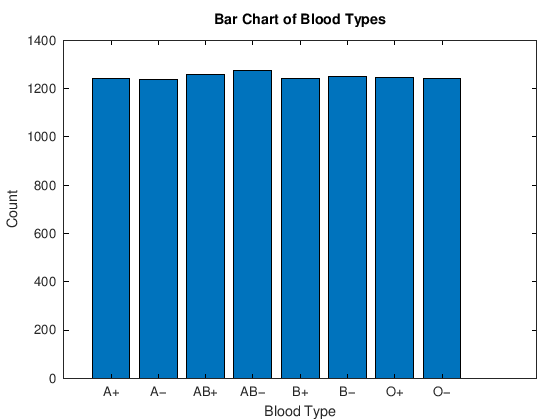

In [8]:
% Open the file for reading
fileID = fopen('healthcare_dataset2.csv', 'r');

% Read the data using textscan, specifying ';' as the delimiter
data = textscan(fileID, '%s %f %s %s %*[^\n]', 'Delimiter', ';', 'HeaderLines', 1);

% Close the file
fclose(fileID);

% Start the timer
tic;

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Extract the blood types column (assuming it's the fourth column)
blood_types = data{4};

% Compute unique blood types and their counts
[unique_blood_types, ~, idx] = unique(blood_types);
blood_type_counts = histc(idx, 1:numel(unique_blood_types));

% Plot the bar chart
bar(1:numel(unique_blood_types), blood_type_counts)
xticks(1:numel(unique_blood_types))
xticklabels(unique_blood_types)
title('Bar Chart of Blood Types')
xlabel('Blood Type')
ylabel('Count')

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Histogram

Time elapsed is 3.952881 seconds


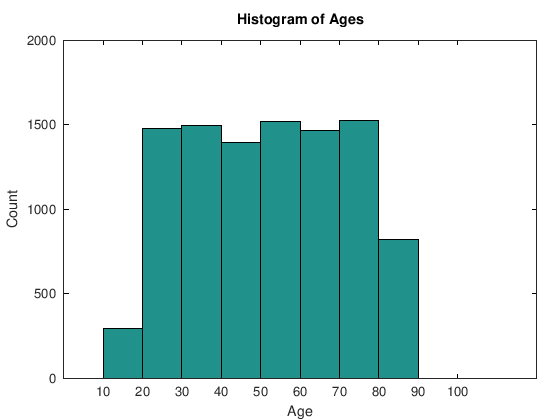

In [4]:
% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Open the file for reading
fileID = fopen('healthcare_dataset2.csv', 'r');

% Read the data using textscan, specifying ';' as the delimiter
data = textscan(fileID, '%*s %d %*[^\n]', 'Delimiter', ';', 'HeaderLines', 1);

% Close the file
fclose(fileID);

% Start the timer
tic;

% Extract the ages column (assuming it's the second column)
ages = data{1};

% Define the bin edges
bin_edges = 10:10:100;

% Compute the histogram
age_counts = histc(ages, bin_edges);

% Plot the histogram
bar(bin_edges, age_counts, 'histc');
title('Histogram of Ages')
xlabel('Age')
ylabel('Count')
% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Box plot

Time elapsed is 12.787016 seconds


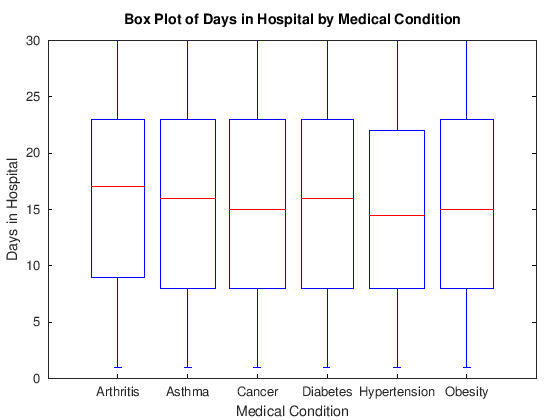

In [2]:
pkg load statistics
% Open the file for reading
fileID = fopen('healthcare_dataset2.csv', 'r');

% Read the data using textscan, specifying ';' as the delimiter
data = textscan(fileID, '%*s %*s %*s %*s %s %*s %*s %*s %*s %*s %*s %*s %*s %*s %*s %d %*[^\n]', 'Delimiter', ';', 'HeaderLines', 1);

% Close the file
fclose(fileID);

% Start the timer
tic;

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')


% Extract the medical condition and days in hospital columns
medical_condition = data{1};
days_in_hospital = data{2};

% Group the days in hospital by medical condition
[unique_conditions, ~, idx] = unique(medical_condition);
grouped_days = accumarray(idx, days_in_hospital, [], @(x) {x});

% Find the maximum group size
max_group_size = max(cellfun(@numel, grouped_days));

% Create a matrix for boxplot, padding shorter groups with NaN
grouped_days_mat = NaN(max_group_size, numel(grouped_days));
for i = 1:numel(grouped_days)
    grouped_days_mat(1:numel(grouped_days{i}), i) = grouped_days{i};
end

% Plot the box plot
boxplot(grouped_days_mat);
set(gca, 'XTickLabel', unique_conditions);
title('Box Plot of Days in Hospital by Medical Condition')
xlabel('Medical Condition')
ylabel('Days in Hospital')

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Penguins dataset visualizations

# Scatter plot matrix

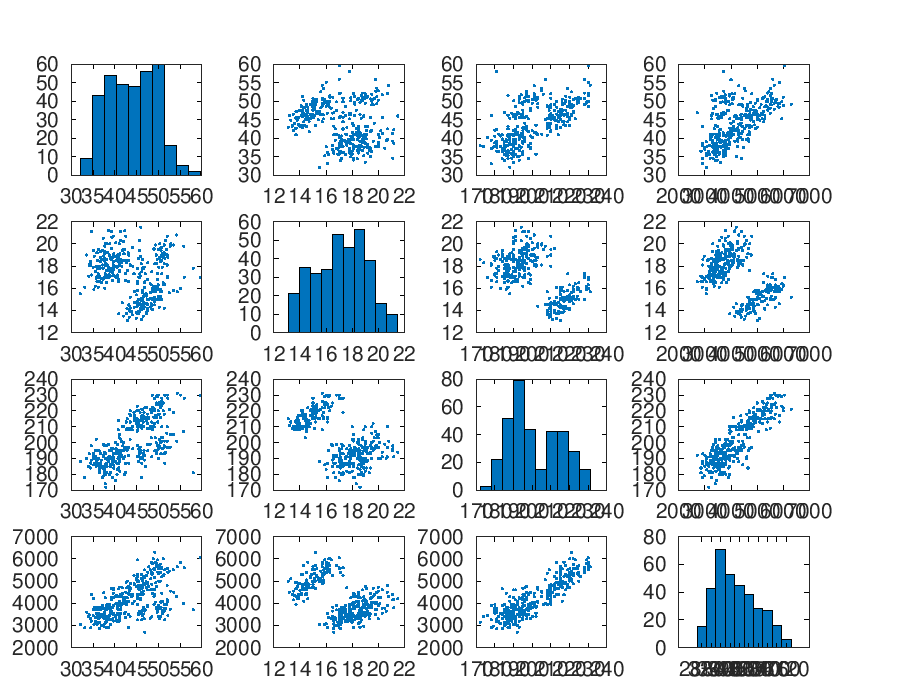

In [2]:
% Load the statistics package
pkg load statistics

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Load the dataset
data = csvread("penguins.csv", 1, 0);

% Extract columns 3 to 6
numeric_data = data(:, 3:6);

% Remove rows with missing values
numeric_data = numeric_data(all(~isnan(numeric_data), 2), :);

% Create a new figure with a larger size
figure('Position', [0, 0, 800, 800]);

% Create scatter plot matrix
plotmatrix(numeric_data);



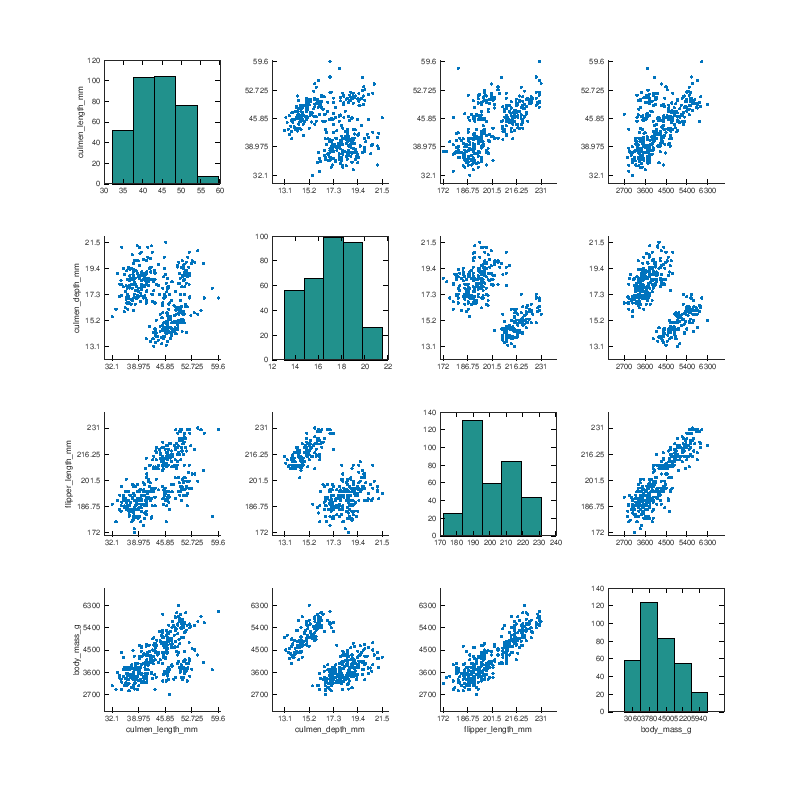

In [15]:
% Load the dataset
data = csvread("penguins.csv", 1, 0);

% Extract columns 3 to 6
numeric_data = data(:, 3:6);

% Remove rows with missing values
numeric_data = numeric_data(all(~isnan(numeric_data), 2), :);

% Column labels
column_labels = {'culmen\\_length\\_mm', 'culmen\\_depth\\_mm', 'flipper\\_length\\_mm', 'body\\_mass\\_g'};

% Get the number of variables (columns)
num_vars = size(numeric_data, 2);

% Create a new figure with a larger size
figure('Position', [0, 0, 800, 800]);
for i = 1:num_vars
    for j = 1:num_vars
        subplot(num_vars, num_vars, (i-1)*num_vars + j);
        if i == j
            hist(numeric_data(:, i), 5); % Adjust the number of bins if needed
            set(gca, 'FontSize', 4);
        else
            scatter(numeric_data(:, j), numeric_data(:, i), '.');
            set(gca, 'FontSize', 4); % Set font size for axes
            % Reduce the number of ticks
            set(gca, 'XTick', linspace(min(numeric_data(:, j)), max(numeric_data(:, j)), 5));
            set(gca, 'YTick', linspace(min(numeric_data(:, i)), max(numeric_data(:, i)), 5));
        end
        if i == 4
            xlabel(column_labels{j}, 'FontSize', 4);  % Use column labels for x-axis with smaller font size
        else
            xlabel('');  % Empty label for other subplots
        end
        if j == 1
            ylabel(column_labels{i}, 'FontSize', 4);  % Use column labels for y-axis with smaller font size
        else
            ylabel('');  % Empty label for other subplots
        end
    end
end


# Heatmap

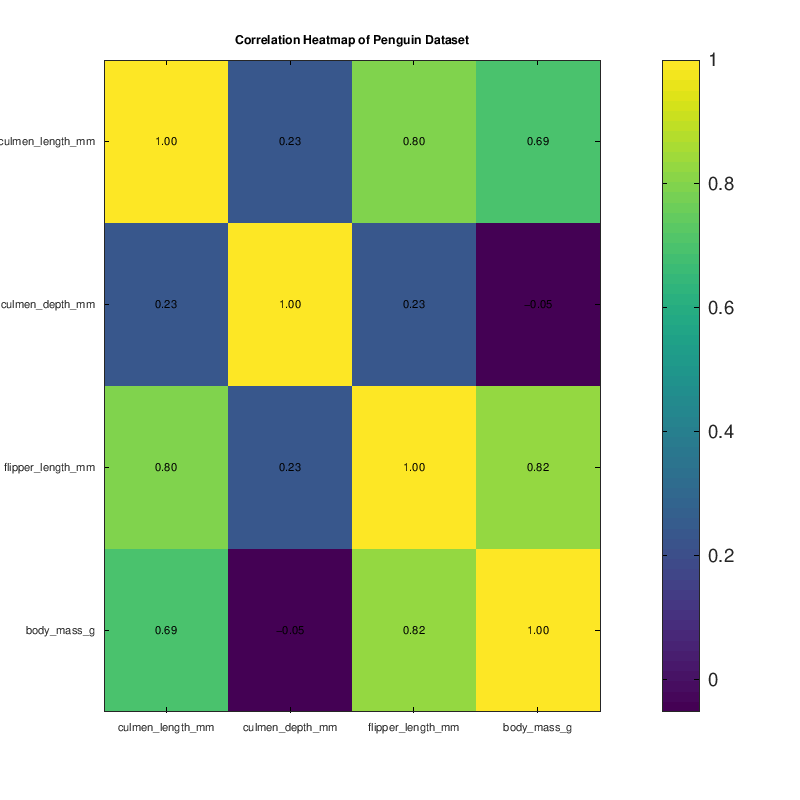

In [16]:
% Load the necessary package
pkg load statistics

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Load the data
data = csvread("penguins.csv");

% Extract columns 3 to 6
numeric_data = data(:, 3:6);

% Replace NaN values with zeros
numeric_data(isnan(numeric_data)) = 0;

% Calculate the correlation matrix
corr_matrix = corr(numeric_data);

% Create a larger figure
figure('Position', [100, 100, 800, 800]);  % Adjust the position and size as needed

% Plot the heatmap
imagesc(corr_matrix);

% Define column labels for columns 3 to 6
column_labels = {'culmen\\_length\\_mm', 'culmen\\_depth\\_mm', 'flipper\\_length\\_mm', 'body\\_mass\\_g'};

% Add ticks and labels for each feature
xticks(1:size(corr_matrix, 1));
yticks(1:size(corr_matrix, 2));

% Set labels for x-axis ticks with smaller font size
xticklabels(column_labels);
set(gca, 'FontSize', 6); % Set font size for x-axis labels

% Set labels for y-axis ticks with smaller font size
yticklabels(column_labels);
set(gca, 'FontSize', 6 ); % Set font size for y-axis labels

% Add values of correlation
for i = 1:size(corr_matrix, 1)
    for j = 1:size(corr_matrix, 2)
        text(j, i, num2str(corr_matrix(i, j), '%.2f'), ...
            'HorizontalAlignment', 'center', 'VerticalAlignment', 'middle', 'FontSize', 6);
    end
end

% Add a color bar
colorbar;

% Add a title
title("Correlation Heatmap of Penguin Dataset");
